**Supervised Learning**


TF playground: [Link](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.37183&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset('iris')
X, y = df[['sepal_length', 'sepal_width',	'petal_length',	'petal_width']], df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.datasets import load_iris, load_digits

# iris = load_iris()
# X, y = iris.data, iris.target

digit = load_digits()
X, y = digit.data, digit.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Random Forest
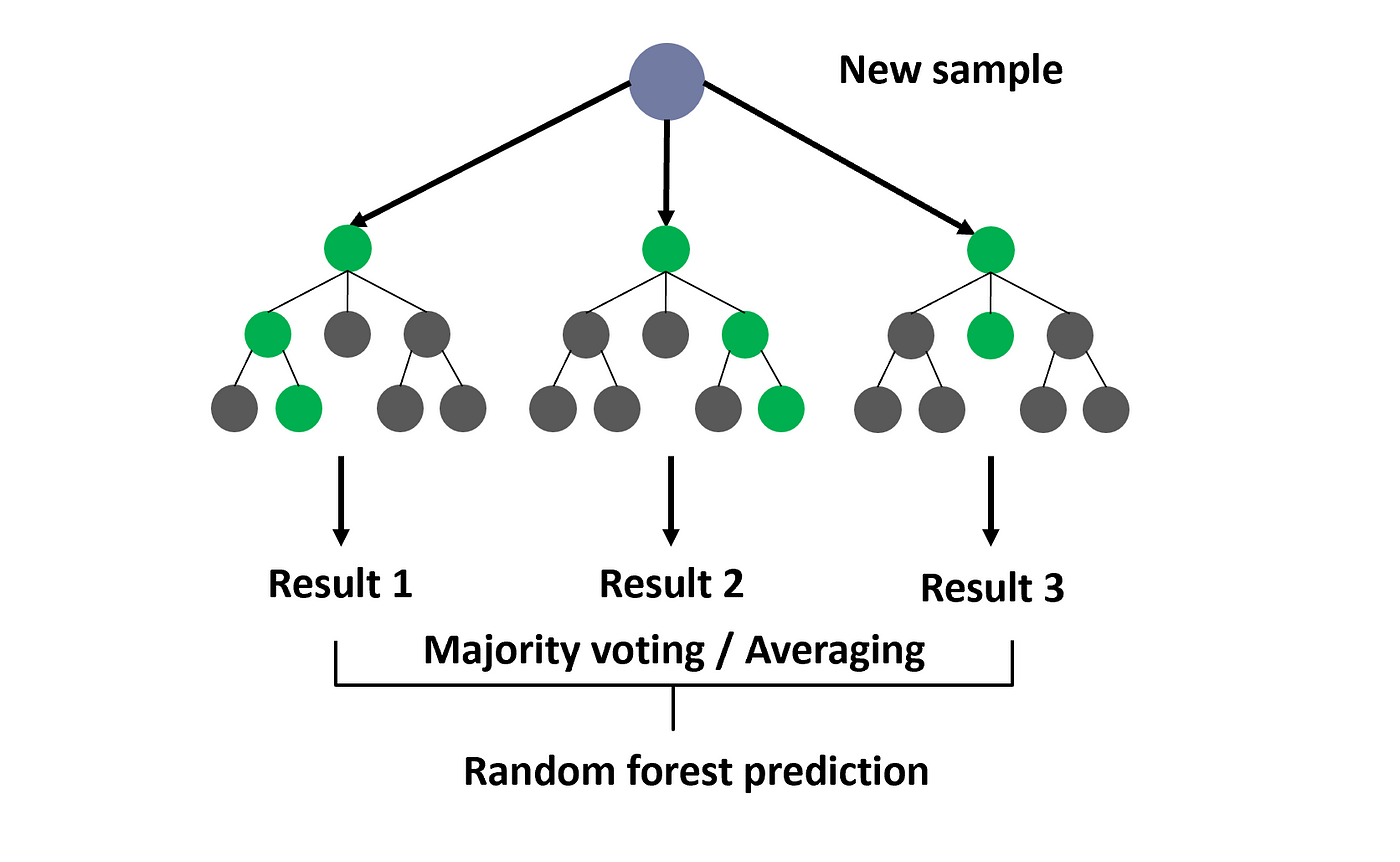

In [ ]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       0.81      0.78      0.79        37
           2       0.73      0.92      0.81        38
           3       0.79      0.91      0.85        46
           4       0.94      0.85      0.90        55
           5       0.98      0.76      0.86        59
           6       0.88      0.98      0.93        45
           7       0.76      0.95      0.85        41
           8       0.95      0.53      0.68        38
           9       0.83      0.81      0.82        48

    accuracy                           0.85       450
   macro avg       0.86      0.85      0.84       450
weighted avg       0.86      0.85      0.85       450



Decision Tree
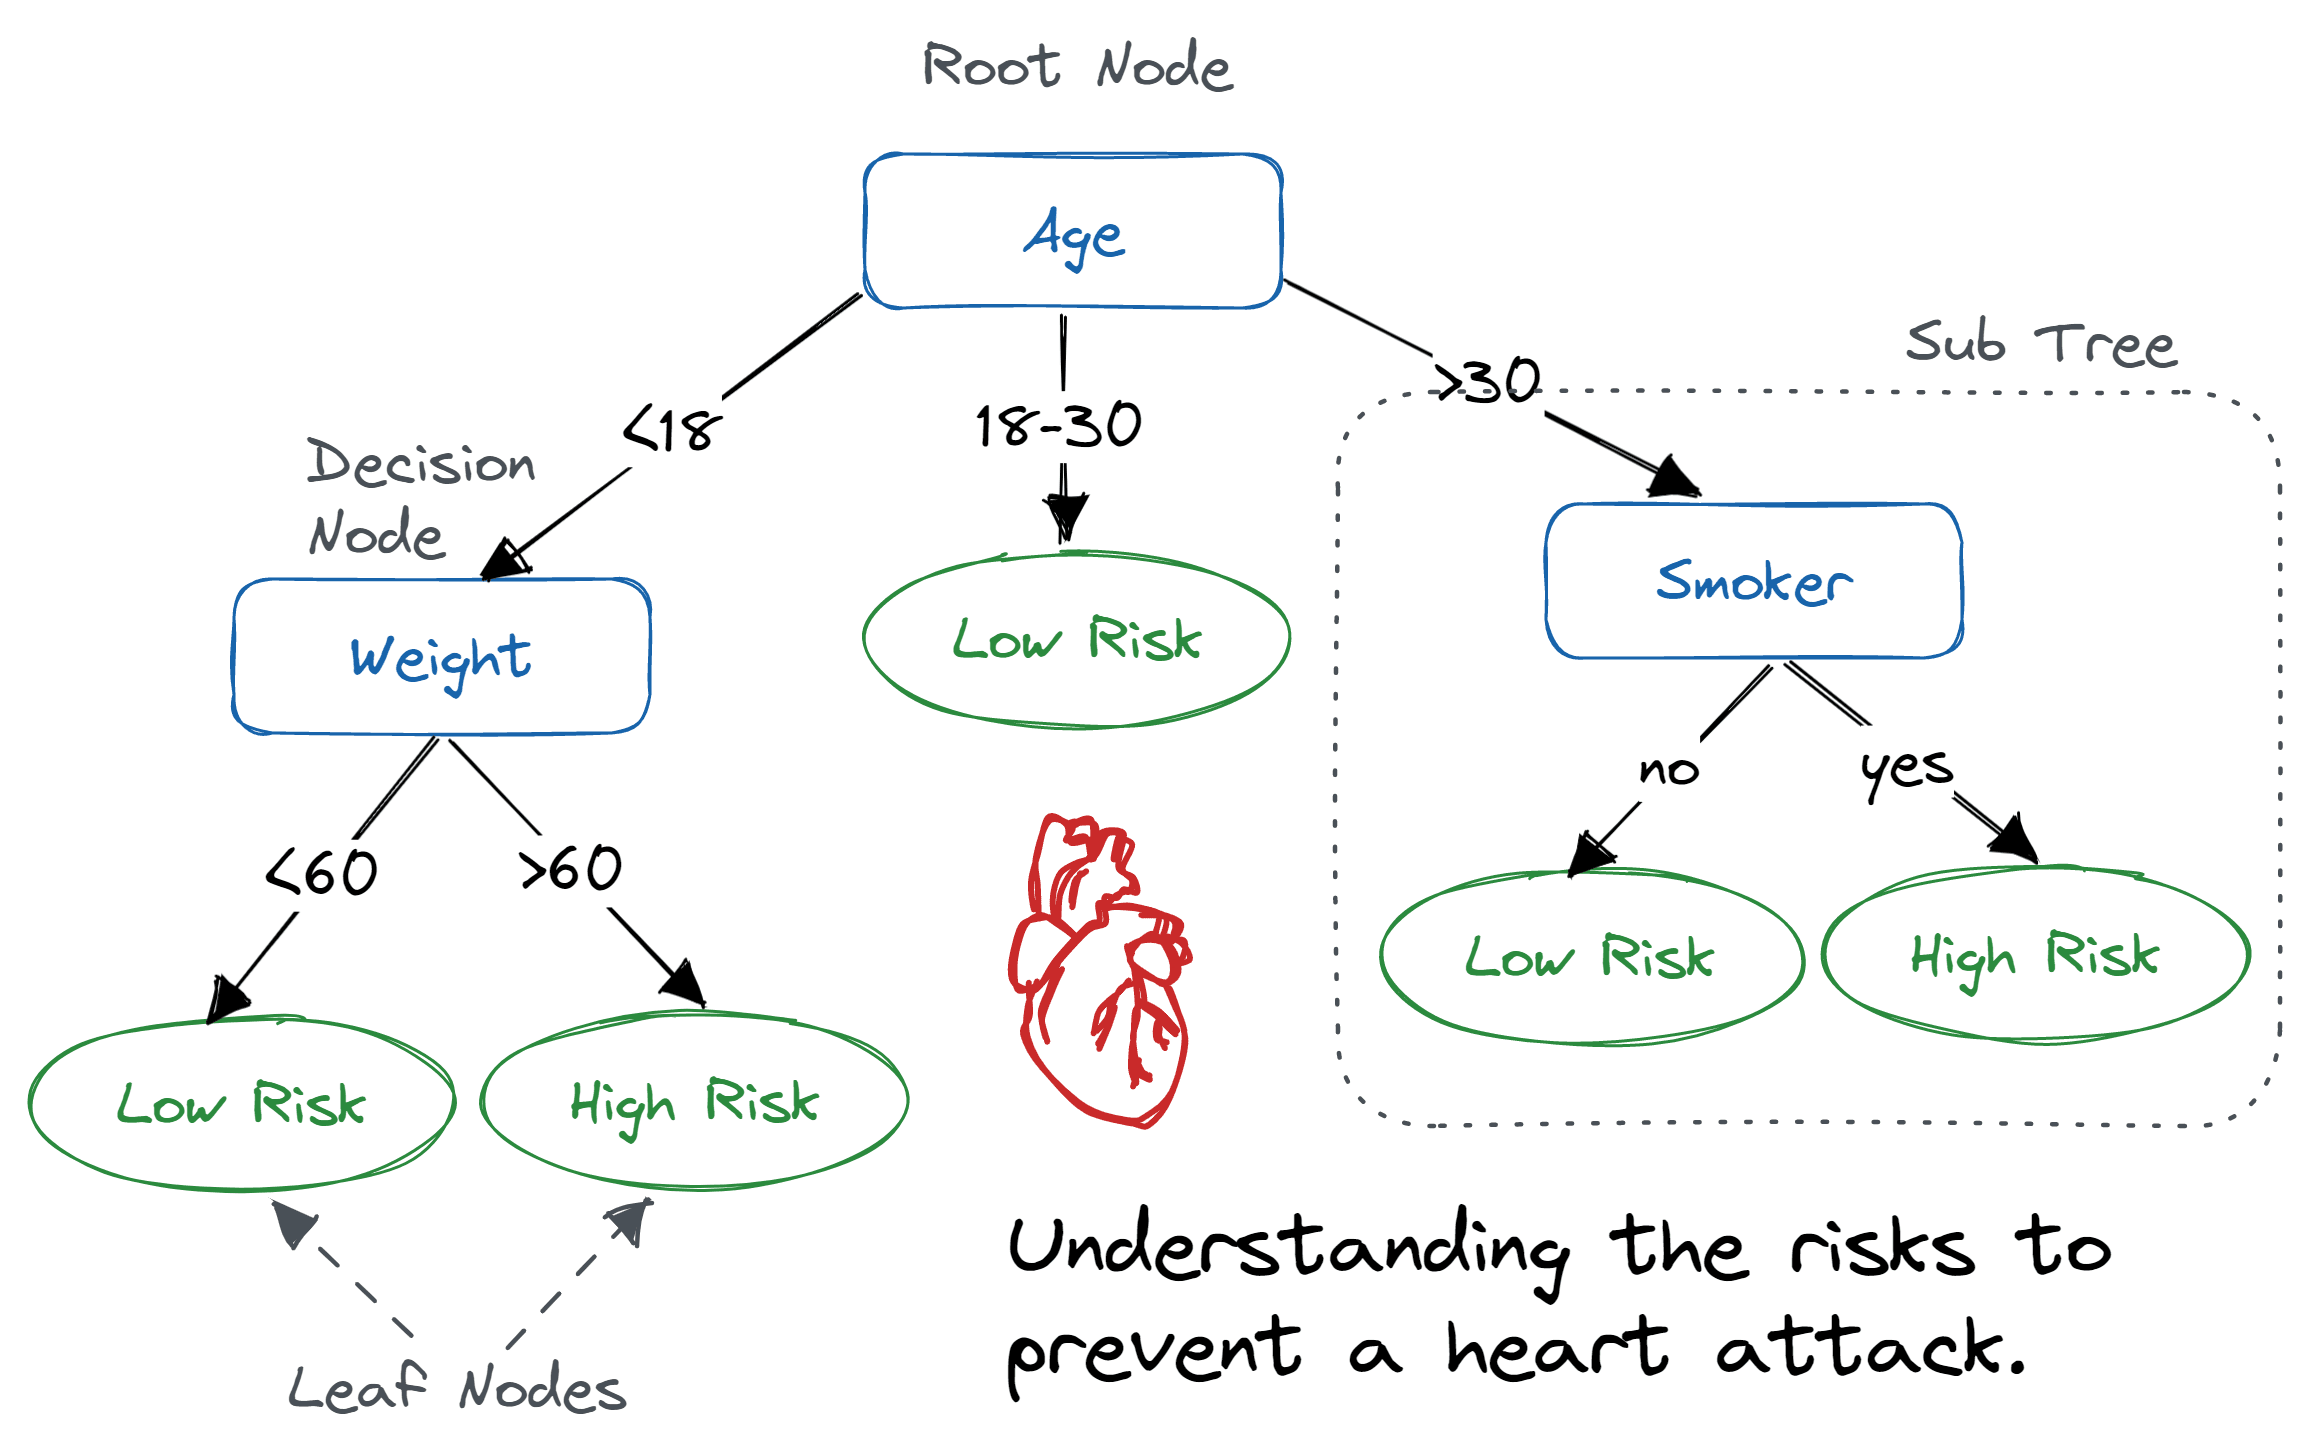

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.86      0.86      0.86        37
           2       0.89      0.82      0.85        38
           3       0.83      0.83      0.83        46
           4       0.90      0.95      0.92        55
           5       0.88      0.86      0.87        59
           6       0.92      0.98      0.95        45
           7       0.86      0.88      0.87        41
           8       0.64      0.71      0.68        38
           9       0.93      0.88      0.90        48

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



In [ ]:
X_train.shape

(1347, 64)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline


clf = RandomForestClassifier(max_depth=2, random_state=0)

anova_filter = SelectKBest(f_classif, k=62)
anova_clf = make_pipeline(anova_filter, clf)

anova_clf.fit(X_train, y_train)
y_pred = anova_clf.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       0.96      0.59      0.73        37
           2       0.66      0.97      0.79        38
           3       0.91      0.91      0.91        46
           4       0.96      0.82      0.88        55
           5       0.98      0.81      0.89        59
           6       0.79      0.98      0.87        45
           7       0.76      0.95      0.85        41
           8       0.96      0.63      0.76        38
           9       0.80      0.85      0.83        48

    accuracy                           0.86       450
   macro avg       0.87      0.85      0.85       450
weighted avg       0.88      0.86      0.85       450



In [ ]:
#### Try a new ML classifier ####

## Optional: Hyperparameter optimization

In [ ]:
!pip3 install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.6 MB/s eta 0:00:00


In [ ]:
import optuna

import sklearn
from sklearn.metrics import accuracy_score

def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest', 'Decision Tree'])
    if classifier_name == 'SVC':
      svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
      classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
    elif classifier_name == 'Decision Tree':
      classifier_obj = tree.DecisionTreeClassifier()
    else:
      rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
      classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)

    classifier_obj.fit(X_train, y_train)
    y_pred = classifier_obj.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-09-30 20:31:24,291] A new study created in memory with name: no-name-95b5df01-9a1c-427c-b452-58028685498b
[I 2024-09-30 20:31:24,696] Trial 0 finished with value: 0.9533333333333334 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 24}. Best is trial 0 with value: 0.9533333333333334.
[I 2024-09-30 20:31:25,011] Trial 1 finished with value: 0.9555555555555556 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 25}. Best is trial 1 with value: 0.9555555555555556.
[I 2024-09-30 20:31:25,304] Trial 2 finished with value: 0.9511111111111111 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 17}. Best is trial 1 with value: 0.9555555555555556.
[I 2024-09-30 20:31:26,393] Trial 3 finished with value: 0.08222222222222222 and parameters: {'classifier': 'SVC', 'svc_c': 7.694647222303555e-07}. Best is trial 1 with value: 0.9555555555555556.
[I 2024-09-30 20:31:26,508] Trial 4 finished with value: 0.8755555555555555 and parameters: {'classifier': 'Decisi